In [6]:
!pip install --user -r requirements.txt

     |████████████████████████████████| 65.1MB 60kB/s 
     |████████████████████████████████| 1.3MB 36.6MB/s 
     |████████████████████████████████| 266kB 34.2MB/s 
     |████████████████████████████████| 327kB 54.0MB/s 
     |████████████████████████████████| 20.4MB 1.8MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 48.5MB 123kB/s 
     |████████████████████████████████| 13.0MB 43.3MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 133kB 44.3MB/s 
     |████████████████████████████████| 215.7MB 67kB/s 
     |████████████████████████████████| 1.5MB 27.5MB/s 
     |████████████████████████████████| 184kB 21.1MB/s 
     |████████████████████████████████| 460kB 47.5MB/s 
     |████████████████████████████████| 82.0MB 83kB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 317kB 37.2MB/s 
 

In [1]:
!pip install --upgrade --user -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to ./src/twint
  Running command git clone -q https://github.com/twintproject/twint.git /content/src/twint
  Running command git checkout -q origin/master
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=ad2045d6c2139c3908786e3f9925986ce73963d37c0c492ca90e0a33c1820dd9
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp36-none-any.whl size=15971 sha256=38ace0a91af7dead76c07353ee5efea011c6201fe14147dbcb3520ada710e15c
  Stored in directory: /root/.cache/pip/wheels/04/63/5f/75e7e94eb62517946116a783e4cd8970c4789c990bbc732616
Successfully built fake-useragent googletransx
  Running setup.py develop for twint


In [2]:
!mv src/twint .
!rm -r src

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("twint/")

In [4]:
import twint

In [5]:
from optimus import Optimus
op = Optimus()

/content


/root/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

In [7]:
import string

In [8]:
from textblob import TextBlob
from IPython.display import Markdown, display

In [9]:
import seaborn as sns


In [13]:
def search_before(search):
  c = twint.Config()
  c.Search = search
# Custom output format
  c.Format = "{username} | {tweet}"
  c.Until = '2019-12-31'
  c.Since = '2019-12-01'
  c.Lang="en"
  c.Limit = 1
  c.Pandas = True

  twint.run.Search(c)

  Tweets_df = twint.storage.panda.Tweets_df
  Tweets_before = Tweets_df[['date', 'tweet', 'user_id', 'username']]

  for char in string.punctuation:
    Tweets_before['tweet'] = Tweets_before['tweet'].str.replace(char, '')
  
  tweets2 = Tweets_before['tweet'].tolist()

  lst = []
  for tweet in tweets2:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        lst.append(1)
    elif analysis.sentiment[0]<0:
        lst.append(-1)
    else:
        lst.append(0)
  
  Tweets_before["Sentiments"] = lst

  return sns.distplot(Tweets_before['Sentiments'])


youkillmyangel | it feels so strange to know i started the decade being obsessed with one direction and feeling at home while investing my time on those babies
BogOtter | Got an absolutely incredible present today from Moogletart honoring Snapples, who we lost in 2019, and welcoming Fizzgig. Feeling very grateful for the amazing people in my life.   My reaction:   https://t.co/SxTqYJyNmg  https://t.co/g67DISDYHH
PortalTracklist | @ohliv_ia What a Feeling podia ser a junção de gerações! A pegada Fleetwood Mac podia chamar atenção dos mais velhos e mesmo assim nada. Coloca injustiçado nisso!
besoindecou | I’m feeling ignorant today
LarryLNichols | If you're feeling like The LORD has abandoned you, please take time to honestly evaluate how much time you're spending alone w/ HIM in quiet, undisturbed, HEART to HEART PRAYER &amp; daily reading HIS WORD; The Bible. In our relationships w/ GOD &amp; JESUS - it isn't THEM who walk away!
purnya2 | @RadDoodCoolTude stay still and consume that'll


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


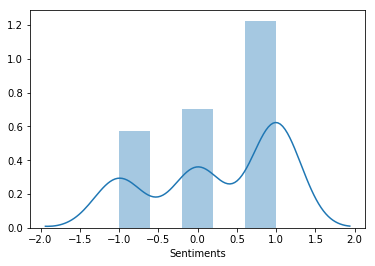

In [14]:
search_before('feeling')

In [19]:
def search_after(search):
  d = twint.Config()
  d.Search = search
# Custom output format
  d.Format = "{username} | {tweet}"
  d.Until = '2020-03-31'
  d.Since = '2020-03-01'
  d.Lang="en"
  d.Limit = 1
  d.Pandas = True

  twint.run.Search(d)

  Tweets_df = twint.storage.panda.Tweets_df
  Tweets_after = Tweets_df[['date', 'tweet', 'user_id', 'username']]

  for char in string.punctuation:
    Tweets_after['tweet'] = Tweets_after['tweet'].str.replace(char, '')
  
  tweets3 = Tweets_after['tweet'].tolist()

  lst = []
  for tweet in tweets3:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        lst.append(1)
    elif analysis.sentiment[0]<0:
        lst.append(-1)
    else:
        lst.append(0)
  
  Tweets_after["Sentiments"] = lst

  return sns.distplot(Tweets_after['Sentiments'])

cxweak | feeling: small
Sephrit | With my computer gone I’ve had a lot of free time and I’m getting the feeling I haven’t had since high school or it could be sEaSoNaL dEpReSsIoN
MonsterEnergyP5 | @FBI @FBIChicago @sophie_swaney @GovBillLee  this girl is getting into people hearts and harassing and will not stop in eads Tennessee feeling out stone county
ThemDems | @Teesa_Michele I wish it made me feel better. Unfortunately, it only leaves me feeling defeated. You can’t fix stupid. 💔  https://t.co/TvGQvEvhsF
TylerOrbits | I’m not feeling blockberry at all with this bullcrap give my girls some freedom damn!!! THEY FINALLY WON A MUSIC SHOW for gods sake   #LOONASNSFREEDOM
NOLABelle83 | @eyelinerandrose Are you feeling better?
nateslate | @ThatEricAlper More Than A Feeling - Boston
JosephPMathews | @daniscoville I definitely sent the feeling wheel to the 8 we used to talk about
Shiverwarp | @chipzel "The most" is so hard to answer. The first movie that came to my mind for evocative and be


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


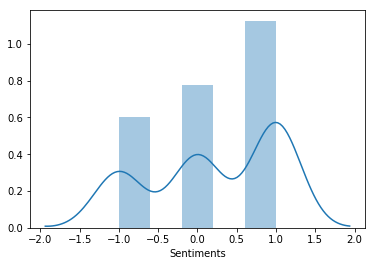

In [20]:
search_after('feeling')

In [24]:
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

In [ ]:
# Set up TWINT config
c = twint.Config()

In [ ]:
c.Search = "feeling OR live"
# Custom output format
c.Format = "{username} | {tweet}"
c.Until = '2019-12-31'
c.Since = '2019-12-01'
c.Lang="en"
c.Limit = 1
c.Pandas = True

In [ ]:
twint.run.Search(c)

youkillmyangel | it feels so strange to know i started the decade being obsessed with one direction and feeling at home while investing my time on those babies
trahl1904 | @immatrip94 Oh I know dont worry Hate dallas I live in the midwest so all I here is "Bla bla dallas good" and its terrible 😂
Shantelle_JJR | Clacton-On-Sea Live Weather: 00:00 AM Temp: 4.2C RH: 94% Wind:0.0mph NW Rain:  0.0 Pressure: 1031.3mb Falling slowly. #Clacton #Essex
BogOtter | Got an absolutely incredible present today from Moogletart honoring Snapples, who we lost in 2019, and welcoming Fizzgig. Feeling very grateful for the amazing people in my life.   My reaction:   https://t.co/SxTqYJyNmg  https://t.co/g67DISDYHH
NadelTV_Youtube | Sieh dir meine Übertragung von meiner PlayStation 4 an! #PS4live (Fortnite)  live at  https://t.co/HxQj5aVVNW
nvjydblood | @_mydearbbh Yeahhhh.. live stream is real 😭
brooklynn_l2 | @kerstynbethke I would loveeee to live in NYC!
jkbruleigh | Ok you all know I don’t approve of ha

In [ ]:
Tweets_df = twint.storage.panda.Tweets_df

In [ ]:
Tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1211799123990581248,1211799123990581248,1.577750e+12,2019-12-30 23:59:59,+0000,,it feels so strange to know i started the deca...,en,[],[],1210277334638637062,1210277334638637062,youkillmyangel,carina is unfuckwitable,1,23,https://twitter.com/youkillmyangel/status/1211...,[],[],0,,False,0,1,0,,feeling OR live,,,,,,,[],,,,
1,1211799123554226176,1211796998585757697,1.577750e+12,2019-12-30 23:59:59,+0000,,@immatrip94 Oh I know dont worry Hate dallas I...,en,[],[],1103038160911556613,1103038160911556613,trahl1904,Trahl1904,1,23,https://twitter.com/trahl1904/status/121179912...,[],[],0,,False,1,1,0,,feeling OR live,,,,,,,"[{'screen_name': 'immatrip94', 'name': 'Anothe...",,,,
2,1211799123231424517,1211799123231424517,1.577750e+12,2019-12-30 23:59:59,+0000,,Clacton-On-Sea Live Weather: 00:00 AM Temp: 4....,en,"[clacton, essex]",[],92112055,92112055,Shantelle_JJR,Shantelle Robinson,1,23,https://twitter.com/Shantelle_JJR/status/12117...,[],[],0,,False,0,0,0,,feeling OR live,,,,,,,[],,,,
3,1211799122870767618,1211799122870767618,1.577750e+12,2019-12-30 23:59:59,+0000,,Got an absolutely incredible present today fro...,en,[],[],231931886,231931886,BogOtter,Bog Otter,1,23,https://twitter.com/BogOtter/status/1211799122...,[https://www.twitch.tv/videos/528626390],[https://pbs.twimg.com/media/ENEs3GAWwAYmtjy.jpg],1,https://pbs.twimg.com/media/ENEs3GAWwAYmtjy.jpg,False,85,19,13,,feeling OR live,,,,,,,[],,,,
4,1211799121318821888,1211799121318821888,1.577750e+12,2019-12-30 23:59:59,+0000,,Sieh dir meine Übertragung von meiner PlayStat...,de,[ps4live],[],900098335805190145,900098335805190145,NadelTV_Youtube,NadelTV,1,23,https://twitter.com/NadelTV_Youtube/status/121...,[https://youtu.be/Qtn3di-fnvw],[],0,,False,0,0,0,,feeling OR live,,,,,,,[],,,,


In [ ]:
Tweets_before = Tweets_df[['date', 'tweet', 'user_id', 'username']]

In [ ]:
Tweets_before.head()

,date,tweet,user_id,username
0,2019-12-30 23:59:59,it feels so strange to know i started the deca...,1210277334638637062,youkillmyangel
1,2019-12-30 23:59:59,@immatrip94 Oh I know dont worry Hate dallas I...,1103038160911556613,trahl1904
2,2019-12-30 23:59:59,Clacton-On-Sea Live Weather: 00:00 AM Temp: 4....,92112055,Shantelle_JJR
3,2019-12-30 23:59:59,Got an absolutely incredible present today fro...,231931886,BogOtter
4,2019-12-30 23:59:59,Sieh dir meine Übertragung von meiner PlayStat...,900098335805190145,NadelTV_Youtube


In [ ]:
Tweets_before.shape

(100, 4)

In [ ]:
Tweets_df.shape

(100, 38)

In [ ]:
for char in string.punctuation:
    Tweets_before['tweet'] = Tweets_before['tweet'].str.replace(char, '')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Tweets_before

,date,tweet,user_id,username
0,2019-12-30 23:59:59,it feels so strange to know i started the deca...,1210277334638637062,youkillmyangel
1,2019-12-30 23:59:59,immatrip94 Oh I know dont worry Hate dallas I ...,1103038160911556613,trahl1904
2,2019-12-30 23:59:59,ClactonOnSea Live Weather 0000 AM Temp 42C RH ...,92112055,Shantelle_JJR
3,2019-12-30 23:59:59,Got an absolutely incredible present today fro...,231931886,BogOtter
4,2019-12-30 23:59:59,Sieh dir meine Übertragung von meiner PlayStat...,900098335805190145,NadelTV_Youtube
...,...,...,...,...
95,2019-12-30 23:59:41,Check out my broadcast from my PlayStation 4 P...,1185291878725382144,ttvbigd
96,2019-12-30 23:59:41,Live w yamsbot BeachHead bouta hit pred soon s...,753037564039294976,Vatroh
97,2019-12-30 23:59:41,TanyaAGT Funnily enough I had a drop of tea tr...,115070532,fenifur
98,2019-12-30 23:59:41,PlayStation 4からブロードキャストを始めました！ PS4live BIOHAZA...,1866058856,majimekun3_


In [ ]:
tweets2 = Tweets_before['tweet'].tolist()

In [ ]:
tweets2[:2]

['it feels so strange to know i started the decade being obsessed with one direction and feeling at home while investing my time on those babies',
 'immatrip94 Oh I know dont worry Hate dallas I live in the midwest so all I here is Bla bla dallas good and its terrible 😂']

In [ ]:
# Pretty printing the result
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

for tweet in tweets2:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        printmd('Positive', color="green")
    elif analysis.sentiment[0]<0:
        printmd('Negative', color="red")
    else:
        printmd("No result", color="grey")
        print("")

it feels so strange to know i started the decade being obsessed with one direction and feeling at home while investing my time on those babies
Sentiment(polarity=-0.275, subjectivity=0.575)


<span style='color:red'>Negative</span>

immatrip94 Oh I know dont worry Hate dallas I live in the midwest so all I here is Bla bla dallas good and its terrible 😂
Sentiment(polarity=-0.24090909090909093, subjectivity=0.75)


<span style='color:red'>Negative</span>

ClactonOnSea Live Weather 0000 AM Temp 42C RH 94 Wind00mph NW Rain  00 Pressure 10313mb Falling slowly Clacton Essex
Sentiment(polarity=-0.08181818181818185, subjectivity=0.44999999999999996)


<span style='color:red'>Negative</span>

Got an absolutely incredible present today from Moogletart honoring Snapples who we lost in 2019 and welcoming Fizzgig Feeling very grateful for the amazing people in my life   My reaction   httpstcoSxTqYJyNmg  httpstcog67DISDYHH
Sentiment(polarity=0.42500000000000004, subjectivity=0.525)


<span style='color:green'>Positive</span>

Sieh dir meine Übertragung von meiner PlayStation 4 an PS4live Fortnite  live at  httpstcoHxQj5aVVNW
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

mydearbbh Yeahhhh live stream is real 😭
Sentiment(polarity=0.16818181818181818, subjectivity=0.4)


<span style='color:green'>Positive</span>

kerstynbethke I would loveeee to live in NYC
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Ok you all know I don’t approve of having phones out when watching poetic cinema but TrixieDelights and I are about to watch Cats and I’m gonna have to live tweet it  If only so you know we haven’t lost our minds
Sentiment(polarity=0.25284090909090906, subjectivity=0.6875)


<span style='color:green'>Positive</span>

真ちゃんはLIVEではあまり泣かないって言ってたけど、オーラスでは涙拭ってたよ。  きっと、これはメッセージだったんだよね  httpstcoIfpItCnZcJ
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


ohlivia What a Feeling podia ser a junção de gerações A pegada Fleetwood Mac podia chamar atenção dos mais velhos e mesmo assim nada Coloca injustiçado nisso
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


If Americans middle class poor or homeless made a list of their needs and priorities for 2020 and beyond who by their consistent voting record could help them live a more hopeful and rewarding life Many already know the answer Bernie Thats what his goal has always been
Sentiment(polarity=0.21233766233766233, subjectivity=0.4785714285714286)


<span style='color:green'>Positive</span>

kitthendery se um dia rolar espero que passemos malchoremos juntas kkkk Aff deixa ele fazer live Depois reclamam que o idol não tem rede social e quando tem não aproveitam o fato de ele querer se aproximar e compartilhar um pouco do dia a dia dele É muito fofo da parte do Ten fazer isso
Sentiment(polarity=0.05656565656565656, subjectivity=0.18888888888888888)


<span style='color:green'>Positive</span>

1RealMir Im stuck in PA and live in WV help me get home please blackrose2222
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

I’m feeling ignorant today
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


shouta0811aoi 充実した1年になったみたいで良かったですଘ੭ˊ꒳​ˋ੭✧ 私は今年だけで2回もLIVEに行けたので満足してます😍😍 来年はもっとしょーたんに会いに行きますね😘 来年も充実した1年を過ごしてください´³ ㄘゅ💕
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


ColeWolfsson If you doing it properlyand know enough about those people then yes it may work like this Otherwise it will most certainly work opposite Do you think telling people they are a waste of oxygen is a good way to moralize Who are we to tell others how they should live anyway
Sentiment(polarity=0.19294990723562153, subjectivity=0.3816326530612245)


<span style='color:green'>Positive</span>

¡Mira la transmisión de mi PlayStation 4 PS4live Fortnite  live at  httpstcobWx1rn0jio
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

If youre feeling like The LORD has abandoned you please take time to honestly evaluate how much time youre spending alone w HIM in quiet undisturbed HEART to HEART PRAYER amp daily reading HIS WORD The Bible In our relationships w GOD amp JESUS  it isnt THEM who walk away
Sentiment(polarity=0.2, subjectivity=0.35833333333333334)


<span style='color:green'>Positive</span>

First time seeing Lexx Season 1 episode 1 so I’m gonna live tweet my reactions And if the show is as bad as the choice of font for the opening credits  then we’re in trouble
Sentiment(polarity=-0.12840909090909086, subjectivity=0.425)


<span style='color:red'>Negative</span>

RadDoodCoolTude stay still and consume thatll make you sick but at least youll gain weight  Here I am moving and skipping meals feeling sick but losing weight
Sentiment(polarity=-0.5761904761904763, subjectivity=0.7047619047619048)


<span style='color:red'>Negative</span>

Check out my broadcast from my PlayStation 4 PS4live Cuisine Royale  live at  httpstcowDDuL6Okfy
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

My sister asked me to stop by the drug store and pick her up some hairspray and I was like we dont even live in Baltimore  httpstcoSRz5bvgTHz
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

RipTidess I’m so glad he’s doing Live From Here now It just means we get more music than we otherwise would and with a larger scope of genres and musicians
Sentiment(polarity=0.28409090909090906, subjectivity=0.625)


<span style='color:green'>Positive</span>

Check out my broadcast from my PlayStation 4 PS4live Apex Legends  live at  httpstcoxSPlJhMIjK
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

As of on the last of the 2019 my goal for next year is to go to atleast one of TWICE concert And see the 1975 live Both of which I’ve been trying to go since past few years but could not go due work and school twice the1975 if you stan these two we can friends 🤙🏻
Sentiment(polarity=-0.0731060606060606, subjectivity=0.21527777777777776)


<span style='color:red'>Negative</span>

I’m feeling a ton better I think I’m gonna set up and stream tonight around 10pm EST Regular stream schedule will be posted soon
Sentiment(polarity=0.25, subjectivity=0.28846153846153844)


<span style='color:green'>Positive</span>

That’s not good 😬 holiday destination 200km from where I live 😥  httpstcoQOkMHTUcat
Sentiment(polarity=-0.10681818181818181, subjectivity=0.55)


<span style='color:red'>Negative</span>

I’m still live Come hang out and watch me fail miserable 🥀  Twitch in bio
Sentiment(polarity=-0.4545454545454546, subjectivity=0.6)


<span style='color:red'>Negative</span>

I hate feeling like this i hate feeling love I hate that its your face i wake up to I hate it that i can remember your voice your hands and warmth I just want my memories to be wiped and my heart to stop
Sentiment(polarity=-0.54, subjectivity=0.8400000000000001)


<span style='color:red'>Negative</span>

IndianaMike75 HarrellRyan1 Anyone public or private Black or White Yellow or Red legal or illegal African or European who doesnt love honor respect and obey the spirit of America One Christian Nation under One God Jesus doesnt deserve to live on the land of America LOVE AMERICA or leave it
Sentiment(polarity=0.047835497835497835, subjectivity=0.23392857142857143)


<span style='color:green'>Positive</span>

Ri01300507 りーすけさん😊 まだ会えてないですねー！ 来年こそは会えますかねー？ ぜひ会ってください！！ 来年もいっぱいLIVE行って、いっぱいLACCOにパワー貰いたいですね！ 来年もよろしくお願いします！ よいお年をー😊
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Oil painting  portrait day 3　LIVE  Déformer amp Abstract amp Expressionism  httpstcox1k1f727kp YouTubeさんから
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Ang sarap sa feeling pag sinasabayan ka ng jowa mo maglaro ng ml💖
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Check out my broadcast from my PlayStation 4 PS4live Dishonored® Definitive Edition  live at  httpstcof94phWGtPg
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Overwhelmed with a feeling of gratitude as I reflect on the 2019 season So ready for 2020 and the start of a new decade More growth to come  OnePride 🦁💙 📸 MikeFerdinande  Ford Field  httpstcoLfyxLea5Z0
Sentiment(polarity=0.2787878787878788, subjectivity=0.48484848484848486)


<span style='color:green'>Positive</span>

nahrainrawandzi Happy birthday nahrain 🎊🎊🎉 may all ur wishes become true inshallah youll live for 220 more years 😁 may u always live in happinessmay God always away from any misery amp unhappiness May u always be successful I wish ya all the best dude 🍻🌷💕
Sentiment(polarity=0.5246753246753246, subjectivity=0.6285714285714284)


<span style='color:green'>Positive</span>

Ugh I hate when a dude act so clingy and I’ve already told them I’m not feeling them So cringe
Sentiment(polarity=-0.8, subjectivity=0.9)


<span style='color:red'>Negative</span>

🔴 LIVE PODCAST BBS Radio Station 1 on Spreaker  httpstco4W5Ua8sMQR
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

IneloquentGirl Youre too kind Genevieve 😉😂 I need to get on it though Im going to make an Analog Amber shirt for the next GCP live
Sentiment(polarity=0.24545454545454545, subjectivity=0.4666666666666666)


<span style='color:green'>Positive</span>

I have a good feeling of whats in store for my future
Sentiment(polarity=0.35, subjectivity=0.36250000000000004)


<span style='color:green'>Positive</span>

jayrashad83 CoachRick57 PhenomHoops You not the only one Cuz I got a walking Tool Box Proven winner Champ MVP but people prefer gas amp dunks From da live streams to da “reporters” We gonna make it out tho Can’t stop Destiny FamilyTies We leaving that quiet mess in 2019 Upp’n it from here on out OnMe 💯
Sentiment(polarity=-0.009659090909090909, subjectivity=0.5020833333333333)


<span style='color:red'>Negative</span>

Check out my broadcast from my PlayStation 4 PS4live Fortnite  live at  httpstcoI7eesDc3Lg
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

deckerfreeman realDonaldTrump MickMulvaneyOMB AmbJohnBolton WHY WOULD U SAY “CHOKE ON THAT” That statement u made is a PERFECT example of US citizens U amp me BOTH having a civil conversation While U R sitting in church next time remember that wish I have stage 4 cancer amp wasn’t supposed to live this long UR keeping the US divided
Sentiment(polarity=0.27159090909090905, subjectivity=0.475)


<span style='color:green'>Positive</span>

Come and see Hu〽️BLeLeel🌚🦉s LIVE in BIGOLIVE    httpstcoFj9QbLgtb3  httpstcoRjto5YZoFy
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Im not feeling anything lately Nothing sounds fun or worthwhile
Sentiment(polarity=0.16666666666666666, subjectivity=0.43333333333333335)


<span style='color:green'>Positive</span>

After the holidays we all need some time to relax and be able head into the New Year feeling recharged ⁣ ⁣ Our Suites and Specialty Rooms are just the place to do so ⁣  ⁣Book your suite escape here👉  httpstcop8ijJTNyXI  📷 samhorine ⁣ fairmonthotels suitelife  httpstcoIiCvbeWDMG
Sentiment(polarity=0.3181818181818182, subjectivity=0.5397727272727273)


<span style='color:green'>Positive</span>

angelgirl1077 If you live in a society you have to abide by societys rules
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

MissouriState now offers all of our graduate educational leadership classes using Zoom streaming technology  Take classes live from home Check out Prepare For School Leadership Now  httpstcobFRhh9TJ7p
Sentiment(polarity=0.1621212121212121, subjectivity=0.25)


<span style='color:green'>Positive</span>

perguntaram pro ten pq você está fazendo uma live se você não pergunta nada depois o ten falou eu só queria encontrar todos vocês e encerrou a live mano o ten é uma pessoa tão incrível como vocês falam isso pra ele ele se importa tanto com a gente  httpstco2XlnhUl4L2
Sentiment(polarity=0.05454545454545454, subjectivity=0.2)


<span style='color:green'>Positive</span>

Check out my broadcast from my PlayStation 4 PS4live The Last of Us™ Remastered  live at  httpstcoeqs5H53yta
Sentiment(polarity=0.06818181818181818, subjectivity=0.2833333333333333)


<span style='color:green'>Positive</span>

Now Playing On Carpe Diem Live Radio YNG Kizzy ft Kells amp Qween Kharma  Ride seedamoment  musicizworldwide
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Live broadcasting community  httpstcoMMW2DFWDg9  httpstcoNoegWNYGTv
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

YuaXIII lol i remember that from Inuyasha and Ookami im feeling VERY old now
Sentiment(polarity=0.465, subjectivity=0.48)


<span style='color:green'>Positive</span>

Feeling left out because everyone in my new town has all these traditional family names and nobody even tries to pronounce my cursed unspeakable name bestowed upon me by a powerful witch
Sentiment(polarity=0.06727272727272726, subjectivity=0.5209090909090909)


<span style='color:green'>Positive</span>

『大晦日に自由人の歌と雑談🍱』 Layla♬⋆さんのMixChannel LIVEに参加しよう！ ミクチャ  httpstcomtIdNLgAyA
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Outside Its getting big on the North Shore of Oahu Hawaii as XL swell fills in  get the latest on the surf watch Pipeline live and more in the SwellAlert  httpstcoJfYMNrM41E  httpstcooXLkNsg1Yi
Sentiment(polarity=0.22727272727272724, subjectivity=0.41)


<span style='color:green'>Positive</span>

Siracusa maltempo live protezionecivile  httpstcoFWhdJegRSA
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

okitanoniisan i was vagetweeting all of you  Cant believe you had the audacity of answering heh thank you i really appreciate 🥺🥺🥺💕 i was feeling a bit down about my art lately but seeing yall say such nice things about it unprompted made me go 😳😳❣
Sentiment(polarity=0.06888888888888889, subjectivity=0.5177777777777778)


<span style='color:green'>Positive</span>

We are live Join us for coverage of todays top stories Watch here  httpstcoP7a6WQPW0q  httpstcoMEFX0pGpqm
Sentiment(polarity=0.3181818181818182, subjectivity=0.5)


<span style='color:green'>Positive</span>

If you want to tell me anything before 2020 do it before 145 PM tomorrow FSU plays at 2 and I have a feeling theyre going to let me down one more time this decade
Sentiment(polarity=0.17222222222222222, subjectivity=0.3944444444444445)


<span style='color:green'>Positive</span>

何泊すんねんお前って荷物で東京向かいます、これあゆバック持ってるけど1泊2日です🤗 LIVEってなんでこんな荷物多くなるんかね？？私だけかね？？笑 新幹線で寝て髪も顔もしっかり作って16時頃会場に着く目安で💪 楽しみすぎる〜  httpstco5DXpnBG5u9
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


quiero escuchar el live in buenos aires pero voy a llorar y no quiero
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Coming up on KSTP  we’re live from Tampa with a massive group of Gophers fans who are making the most of OutbackBowl week  You’ll feel warmer just by watching  httpstcoE7dfjdSG4N
Sentiment(polarity=0.21212121212121213, subjectivity=0.6666666666666666)


<span style='color:green'>Positive</span>

They end up becoming close friends despite their differences Werewolves dont live forever though but Leonard stays in contact with and helps Simons grandchildren wherever he can 🥺
Sentiment(polarity=0.2931818181818182, subjectivity=0.675)


<span style='color:green'>Positive</span>

Don’t put yo feeling in nothing u can’t control Get a bankroll amp keep it goin fuck that other shit
Sentiment(polarity=-0.2416666666666667, subjectivity=0.5916666666666667)


<span style='color:red'>Negative</span>

Ese feeling cuando piensas en alguien y al minuto te manda mensaje 👌
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


NudaleKawonu 🥺 shipping is hella expensive and I live with 7 others
Sentiment(polarity=-0.18181818181818182, subjectivity=0.6)


<span style='color:red'>Negative</span>

If people were to live a day in my life prehaps i might be better understood
Sentiment(polarity=0.3181818181818182, subjectivity=0.5)


<span style='color:green'>Positive</span>

Hey all Going live right now on ApexLegends  We will be trying to climb up the ranked ladder Come check it out  httpstcoJRVOQYOGKS
Sentiment(polarity=0.21103896103896103, subjectivity=0.5178571428571428)


<span style='color:green'>Positive</span>

Live broadcasting community  httpstcokqF1f8k0O2  httpstcok51smTA37B
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Check out my broadcast from my PlayStation 4 PS4live Call of Duty® Modern Warfare®  live at  httpstcoE91i1GO25p
Sentiment(polarity=0.16818181818181818, subjectivity=0.4)


<span style='color:green'>Positive</span>

ayumi0512live 検索より失礼します。 良ければ教えて欲しいです。
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


kryptoklepto Debicas50 cryptosthanos I wanted solar panels so I can make use of the sun in powering the nearby village close to where I live
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

kurtfearnley I have torn feeling towards the fireworks display in Sydney Of course we could all complain about the money thats spent to put on the show but Also we shouldnt surrender  feeling positive that money will be raised for Aid in Sydneys biggest money spinner
Sentiment(polarity=0.06363636363636363, subjectivity=0.3227272727272727)


<span style='color:green'>Positive</span>

2 In Tallinn LittleZeus gave marzipan another shot and concluded that the next time shes not feeling well shell simply follow historical precedent and devour a dose or two bondandthomas  httpstcoTzjwOdxGze
Sentiment(polarity=0.0, subjectivity=0.11904761904761905)


<span style='color:grey'>No result</span>


urgaakR6 envoi le live 
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

¡Echa un vistazo a mi transmisión desde mi PlayStation 4 PS4live Fortnite  live at  httpstco66kMb5NwX3
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Just because I live in Arizona let be known we have temps in zero range cold weather and snow
Sentiment(polarity=-0.2318181818181818, subjectivity=0.75)


<span style='color:red'>Negative</span>

kinsellawarren Mmm Not only the gravely ill People who feel overwhelmed with lifes circumstances just want to get thru the holidays Be kind to each other and reach out for help if feeling overwhelmed
Sentiment(polarity=-0.0062500000000000056, subjectivity=0.81875)


<span style='color:red'>Negative</span>

Sometimes I’ve been feeling anxious that my heart feels like it’s about to pop out my chest My body starts shaking and I have no control over my own mindset
Sentiment(polarity=0.175, subjectivity=1.0)


<span style='color:green'>Positive</span>

Just went live Come hang out and have fun with me  httpstco2HFFKeveZi
Sentiment(polarity=0.21818181818181817, subjectivity=0.35)


<span style='color:green'>Positive</span>

naomassmass ありがとう💛  こちらこそ🥰仲良くしてくれてありがとう〜🙌🏻💜なおちゃんと沢山お話出来て💗LIVEにもご一緒できて本当に素敵な1年だった〜また来年もよろしくお願いします💚 まっすーに早く会いたいね🥺💛
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


McKenna Dale knocks down the triple Bears have hit 1021 3PT 476  End 3Q  USF 51 Brown 47  Watch Live  httpstcoBnyC9yaedX  GoBruno IvyHoops  httpstcoihLhxsc280
Sentiment(polarity=-0.009595959595959616, subjectivity=0.3944444444444445)


<span style='color:red'>Negative</span>

and Im a shadow of a ghost Its feeling as if somebody has taken host babe I dont wanna make a scene but I get selfdestructive and its driving you away Its driving you away piece by piece nemesisvajseli
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


juralive ワールドフリッパーおすすめです
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Important note from being here live she rules
Sentiment(polarity=0.2681818181818182, subjectivity=0.75)


<span style='color:green'>Positive</span>

‼️Korea Storytime‼️  my old science teacher used to teach and live in korea he didn’t know korean very fluently so one time he was taking a taxi and he used extremely informal language and he had no idea and the taxi driver slap the absolute shit outta him   should do more
Sentiment(polarity=0.11590909090909093, subjectivity=0.6)


<span style='color:green'>Positive</span>

Attempted ice skating at the Rockerfella rink and avoided breaking my ankles Still feeling sore though  httpstcoxl7ZLKHHNJ
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


hailpeezy me announcing my reason to live 😂
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

randyportillo60 Stop feeling sorry for yourself already let’s get money
Sentiment(polarity=-0.5, subjectivity=1.0)


<span style='color:red'>Negative</span>

my mom is on the phone with his mom and shes super aware of how fucked up he is in the head and apparently theres even more to it that i had no fucking clue about  oh god the shit i overheard them talking about has me FEELING ACTUAL DREAD
Sentiment(polarity=0.07916666666666666, subjectivity=0.5208333333333333)


<span style='color:green'>Positive</span>

If you live in northern Michigan you will need to know this tonight  httpstcoQRTlXrJI0e
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

arttavana Bro why don’t you go back to making a difference in the world like live tweeting your acid trips That was revolutionary and will surely change the world in a positive way
Sentiment(polarity=0.2159090909090909, subjectivity=0.48358585858585856)


<span style='color:green'>Positive</span>

dazzo716 I dont think that gentleman could live without his Cable tv flip phone or microwave so I call bullshit
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Eagles  Peaceful easy feeling  httpstco7FWr0U1IY5 via YouTube
Sentiment(polarity=0.3416666666666667, subjectivity=0.6666666666666667)


<span style='color:green'>Positive</span>

Check out my broadcast from my PlayStation 4 PS4live Fortnite  live at  httpstcolssOYrfqTO
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

Live w yamsbot BeachHead bouta hit pred soon so come thru Live till sun rise 👀⛅️   httpstcoq4CnNbdPzy  httpstcoIhYCkfscP2
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

TanyaAGT Funnily enough I had a drop of tea tree in too Thyme is meant to be good for strep A though I’m currently in too much pain to talk or swallow even after 4 each of nurofen and panadol so am drooling into tissues and praying I wake up feeling better 😆
Sentiment(polarity=0.27999999999999997, subjectivity=0.44000000000000006)


<span style='color:green'>Positive</span>

PlayStation 4からブロードキャストを始めました！ PS4live BIOHAZARD RE2 Z Version  live at  httpstcoLBKuFrfPqn
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

melanylolee Posta simmmmm vc cantando na live foi incrível não tenha vergonha do seu talento que é maravilhoso♥️
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


<span style='color:green'>Positive</span>

In [ ]:
lst = []
for tweet in tweets2:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        lst.append(1)
    elif analysis.sentiment[0]<0:
        lst.append(-1)
    else:
        lst.append(0)

In [ ]:
lst[:5]

[-1, -1, -1, 1, 1]

In [ ]:
Tweets_before["Sentiments"] = lst


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Tweets_before.head()

,date,tweet,user_id,username,Sentiments
0,2019-12-30 23:59:59,it feels so strange to know i started the deca...,1210277334638637062,youkillmyangel,-1
1,2019-12-30 23:59:59,immatrip94 Oh I know dont worry Hate dallas I ...,1103038160911556613,trahl1904,-1
2,2019-12-30 23:59:59,ClactonOnSea Live Weather 0000 AM Temp 42C RH ...,92112055,Shantelle_JJR,-1
3,2019-12-30 23:59:59,Got an absolutely incredible present today fro...,231931886,BogOtter,1
4,2019-12-30 23:59:59,Sieh dir meine Übertragung von meiner PlayStat...,900098335805190145,NadelTV_Youtube,1


In [ ]:
Tweets_before.to_csv('A.csv')

In [ ]:
d = twint.Config()

In [ ]:
d.Search = "feeling OR live"
# Custom output format
d.Format = "{username} | {tweet}"
d.Until = '2020-03-31'
d.Since = '2020-03-01'
d.Lang="en"
d.Limit = 1
d.Pandas = True

In [ ]:
twint.run.Search(d)

kirstikoo | @TheRosie Chucked a whole chicken in mine this morning, shredded it and had amazin chicken and coleslaw "burgers" couldnae live without mine  https://t.co/CqiNF8Trd2
Jessa | TOMORROW!!! I’m gonna go “LIVE” on Facebook &amp; Instagram for the first time ever!! So excited to play some songs &amp; chat with you guys💕 make sure to put it on your calendar &amp; follow me at @jessamusic on Facebook &amp; Instagram to watch the show :)  https://t.co/6rFCgAv9wG
__adrianw__ | gente o matheus na live scrr KKKKKKKKKKKKKKKKKK
MintChip04 | @ResultsMayGARY Nah live that shit
UKAthletics | #BBN, you ready? It’s time for another episode of BBN Live presented by http://ecoachsports.com @ECoach. Tune in as @UKCoachLawson and @UKCoachSkinner sitdown with @Darren_Headrick and chat about sports and daily life. #WeAreUK.  https://t.co/iGXUvyivzA
cutyqpink | You can watch videos on V LIVE.  https://t.co/j41M6hEQAc
GuiGross10 | primeira música da live do MEK "te assumi pro brasil" ai fode com nois

In [ ]:
Tweets_df = twint.storage.panda.Tweets_df

In [ ]:
Tweets_after = Tweets_df[['date', 'tweet', 'user_id', 'username']]

In [ ]:
Tweets_after.head()

,date,tweet,user_id,username
0,2020-03-30 23:59:59,@TheRosie Chucked a whole chicken in mine this...,213699902,kirstikoo
1,2020-03-30 23:59:59,TOMORROW!!! I’m gonna go “LIVE” on Facebook &a...,212963561,Jessa
2,2020-03-30 23:59:59,gente o matheus na live scrr KKKKKKKKKKKKKKKKKK,1078786132081606656,__adrianw__
3,2020-03-30 23:59:59,@ResultsMayGARY Nah live that shit,118949501,MintChip04
4,2020-03-30 23:59:59,"#BBN, you ready? It’s time for another episode...",24929053,UKAthletics


In [ ]:
for char in string.punctuation:
    Tweets_after['tweet'] = Tweets_after['tweet'].str.replace(char, '')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
tweets3 = Tweets_after['tweet'].tolist()

In [ ]:
lst2 = []
for tweet in tweets3:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        lst2.append(1)
    elif analysis.sentiment[0]<0:
        lst2.append(-1)
    else:
        lst2.append(0)

In [ ]:
lst2[:5]

[-1, 1, 1, -1, 1]

In [ ]:
Tweets_after["Sentiments"] = lst2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Tweets_after.head()

,date,tweet,user_id,username,Sentiments
0,2020-03-30 23:59:59,TheRosie Chucked a whole chicken in mine this ...,213699902,kirstikoo,-1
1,2020-03-30 23:59:59,TOMORROW I’m gonna go “LIVE” on Facebook amp I...,212963561,Jessa,1
2,2020-03-30 23:59:59,gente o matheus na live scrr KKKKKKKKKKKKKKKKKK,1078786132081606656,__adrianw__,1
3,2020-03-30 23:59:59,ResultsMayGARY Nah live that shit,118949501,MintChip04,-1
4,2020-03-30 23:59:59,BBN you ready It’s time for another episode of...,24929053,UKAthletics,1


In [ ]:
Tweets_after.to_csv('C.csv')

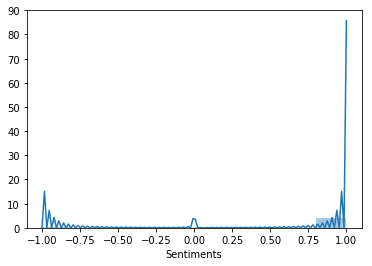

In [ ]:
sns.distplot(Tweets_after['Sentiments'])


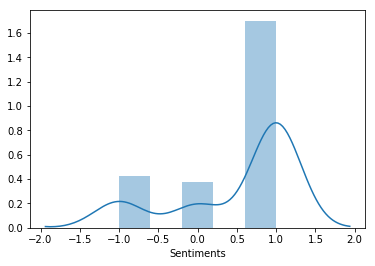

In [ ]:
sns.distplot(Tweets_before['Sentiments'])

NameError: ignored